# Zadanie
Zadanie polega na własnoręcznym zaimplementowaniu algorytmu k-means. Algorytm powinien być zaimplementowany w oparciu o bibliotekę `Numpy`. Podczas implementacji nie wolno korzystać z bibliotek typu `sklearn`, które mają ten algorytm wbudowany. Dopuszczalne jest natomiast wykorzystywanie tego rodzaju bibliotek w celach porównawczych, do sprawdzenia czy nasz algorytm działa poprawnie. Ocenie podlega rozwiązanie i odpowiedź.


- Zaimplementuj `K-means` w przestrzeni dwuwymiarowej (każdy punkt ma dwie współrzędne). - *(dostateczny)*
- Zmniejsz problem związany z 'utknięciem' w lokalnym optimum poprzez wywołanie algorytmu 100 razy i wybranie rozwiązania z najmniejszą funkcją kosztu - *(dostateczny plus)*
- Zwizualizuj wyniki na wykresie - *(dobry)*
- Rozszerz swoją implementację o `K-means++` lub zmień ją tak by działała w n-wymiarowej przestrzeni - *(bardzo dobry)*

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [93]:
rng = np.random.default_rng()

In [94]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


Przykładowy kod do generowania punktów

In [95]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

Przykładowy kod do wyświetlenia wygenerowanych punktów

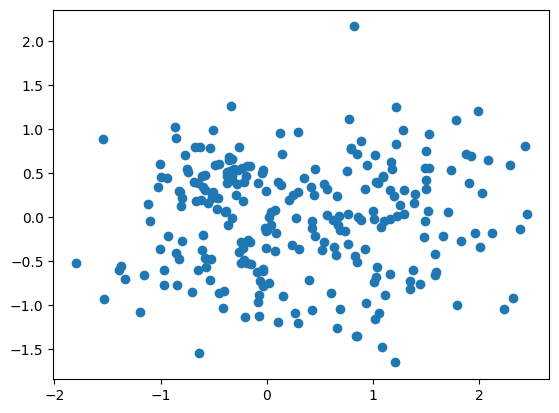

In [96]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()

In [97]:
def calculateDistance(a, b):
  distances = np.zeros(len(a))
  for i in range(len(b)):
    subtracted = a[:, i] - b[i]
    distances += subtracted ** 2
  np.sqrt(distances)
  return distances

In [98]:
def assign_points_to_centroids(points, centroids):
  k = len(centroids)
  distances = [calculateDistance(points, i) for i in centroids]
  points_of_centroids = [[] for i in range(k)]
  for i in range(len(points)):
    point_distances = [j[i] for j in distances]
    minimal_distance_index = np.array(point_distances).argmin()
    points_of_centroids[minimal_distance_index].append(points[i])
  converted_to_numpy_array = list(map(np.array, points_of_centroids))
  return converted_to_numpy_array



In [99]:
from numpy.ma.core import shape
def show_scatter_plot_with_points_and_centroids(assigned_points, centroids):
  for i in range(len(assigned_points)):
    plt.scatter(assigned_points[i][:, 0], assigned_points[i][:, 1], c = colors[i])
    plt.scatter(centroids[i, 0], centroids[i, 1], c = colors[i], marker = 'x')
  plt.show()


In [100]:
def calculate_cost(assigned_points, centroids):
  m = len(assigned_points)
  sum_of_errors = 0
  for i in range(m):
    current_cluster = assigned_points[i]
    current_cluster -= centroids[i]
    current_cluster **= 2
    sum_of_errors += np.sum(current_cluster)
  return sum_of_errors

In [101]:
def generate_random_centroids(k, points, rng):
  max = np.max(points, axis = 0)
  min = np.min(points, axis = 0)
  return rng.uniform(min, max, (k, points.shape[1]))

In [102]:
def generate_centroids_with_minimal_cost(k, points, rng, n = 100):
  minimal_cost = -1
  minimal_cost_centroids = np.empty((k, points.shape[1]))
  for i in range(n):
    tmp_centroids = generate_random_centroids(k, points, rng)
    tmp_assigned = assign_points_to_centroids(points, centroids)
    cost = calculate_cost(tmp_assigned, tmp_centroids)
    if minimal_cost == -1 or cost < minimal_cost:
      minimal_cost = cost
      minimal_cost_centroids = tmp_centroids
  converted_to_numpy_array = np.array(minimal_cost_centroids)
  return converted_to_numpy_array, minimal_cost






In [103]:
def update_centroids(assigned_points):
  updated = []
  for i in range(len(assigned_points)):
    mean = np.mean(assigned_points[i], axis = 0)
    updated.append(mean)
  converted_to_numpy_array = np.array(updated)
  return converted_to_numpy_array

In [104]:
def k_means(points, k, method = 'k_means++', rng = None, centroids = None):
  cents = None

  if centroids is None:
    if rng is None:
      rng = np.random.default_rng()
    if method == 'random':
      cents = generate_centroids_with_minimal_cost(k, points, rng)[0]
    else:

      cents = np.empty((k, points.shape[1]))

      cents[0] = points[int(rng.uniform(0, len(points)))]
      

      for i in range(k - 1):
        index = i
        if len(cents) > 1:
          dists = [calculateDistance(points, j) for j in cents]
          dists2 = np.empty((len(points), 1))
          for j in range(len(points)):
            point_distances = [k[j] for k in dists]
            dists2[j] = dists[np.argmin(point_distances)][j]

        dists2 **= 2
        dists3 = dists2[0]

        probs = np.exp(dists2)
        probs = probs / sum(probs)
       
        cents[i + 1] = points[rng.choice(range(len(dists2)), p = probs[:, 0])]






  else:
    cents = centroids

  assigned_p = assign_points_to_centroids(points, cents)
  

  updated_cents = update_centroids(assigned_p)

  while not (cents == updated_cents).all():
    assigned_p = assign_points_to_centroids(points, updated_cents)
    cents = updated_cents

    updated_cents = update_centroids(assigned_p)
  print(cents)
  return assigned_p, cents


In [105]:
int(rng.uniform(0, len(points)))

1

In [106]:
t = k_means(points, 2, centroids = centroids)
show_scatter_plot_with_points_and_centroids(t[0], t[1])

NameError: ignored

In [107]:
from sklearn.cluster import KMeans

r = KMeans(2, init = centroids).fit(points)
print(r.cluster_centers_)
print(r.inertia_)



NameError: ignored

In [ ]:
print(generate_centroids_with_minimal_cost(2, points, rng)[0])

### Random initialization with k repeats

In [ ]:
f = k_means(points, 4, 'random', rng)
show_scatter_plot_with_points_and_centroids(f[0], f[1])

### K_means++

[[-0.4060264   0.4420421 ]
 [ 1.23325734 -0.7037938 ]
 [-0.37625523 -0.58412565]
 [ 1.1873647   0.41593367]]


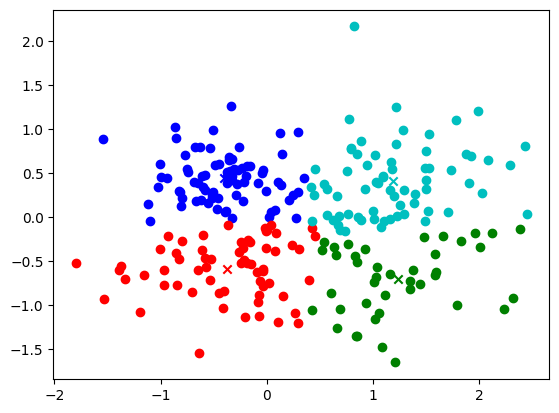

In [108]:
f = k_means(points, 4, rng = rng)
show_scatter_plot_with_points_and_centroids(f[0], f[1])

### Testing with SKLearn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[-0.34295056  0.40578325]
 [ 1.39147123  0.42804164]
 [-0.52816423 -0.62876714]
 [ 0.91308829 -0.61218198]]


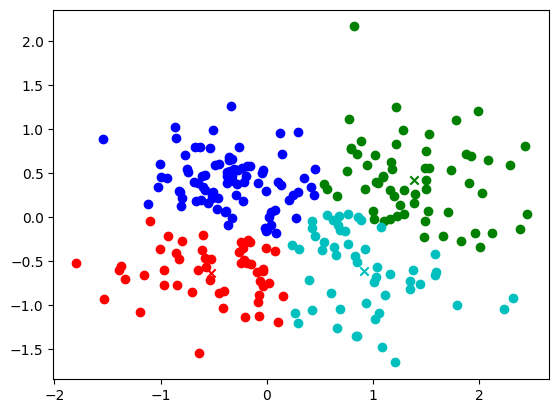

In [128]:
r = KMeans(4).fit(points)
print(r.cluster_centers_)
tmp = np.empty_like(f[0])
for i in range(len(tmp)):
  tmp[i] = []
for i in range(len(r.labels_)):
  tmp[r.labels_[i]].append(points[i])
for i in range(len(tmp)):
  tmp[i] = np.array(tmp[i])
show_scatter_plot_with_points_and_centroids(tmp, r.cluster_centers_)